In [1]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from numpy import *

def hps(signal, rate, harmony = 3):
    #jezeli dwa kanaly to usredniamy je
    if len(signal.shape) == 2:        
        signal = (signal[:,0]+signal[:,1])/2
    
    #przemnozenie przez funkcje okna
    signal = signal * np.hamming(signal.shape[0])
    
    #obliczenie fft
    spec = np.abs(fft.fft(signal))
    
    #obliczenie czestotliwosc (od 0 do rate)
    freqs = np.arange(0, rate, rate/signal.size)
    
    #dlugosc finalnego spektrum
    length = int(np.ceil(spec.size/harmony))
    
    #wyliczenie nowego spektrum i downsampling
    new_spec = spec[:length].copy()
    for i in range(2, harmony+1):
        new_spec *= spec[::i][:length]
        
    #odfiltrowanie niepotrzebnych czestotliwosci
    for i in range(len(freqs[:length])):
        if freqs[i] < 70:
            new_spec[i] = 0
        
    return (new_spec, freqs[:length])

(131971,)


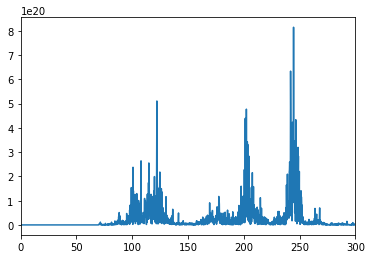

In [2]:
#przyklad
rate, data = wavfile.read("005_M.wav")
print(data.shape)
y, x = hps(data, rate)
plt.xlim((0,300))
plt.plot(x,y)

In [3]:
from os import listdir

pomylek = 0

dobrze_rozpoznany_mezczyzna = 0
zle_rozpoznany_mezczyzna = 0
dobrze_rozpoznana_kobieta = 0
zle_rozpoznana_kobieta = 0

for file in listdir():
    if file[0] != '0':
        continue
    rate, data = wavfile.read(file)    
    y, x = hps(data, rate, harmony=3)
    freq = x[np.argmax(y[1:])]
    
    if freq < 180:
        print(file, "M", file[4])
        if file[4] == 'K':
            pomylek += 1
            zle_rozpoznany_mezczyzna += 1
        else:
            dobrze_rozpoznany_mezczyzna += 1
    else:
        print(file, "K", file[4])
        if file[4] == 'M':
            pomylek += 1
            zle_rozpoznana_kobieta += 1
        else:
            dobrze_rozpoznana_kobieta += 1
            
print("pomylek:", pomylek, "dokladnosc:",(91-pomylek)/91)
print("dobrze_rozpoznany_mezczyzna", dobrze_rozpoznany_mezczyzna)
print("zle_rozpoznany_mezczyzna", zle_rozpoznany_mezczyzna)
print("dobrze_rozpoznana_kobieta", dobrze_rozpoznana_kobieta)
print("zle_rozpoznana_kobieta", zle_rozpoznana_kobieta)
    

<ipython-input-3-f1b9cb2af75a>:13: WavFileWarning: Reached EOF prematurely; finished at 613916 bytes, expected 613924 bytes from header.
  rate, data = wavfile.read(file)


001_K.wav K K
002_M.wav M M
003_K.wav K K
004_M.wav M M
005_M.wav K M
006_K.wav K K
007_M.wav M M
008_K.wav K K
009_K.wav K K
010_M.wav M M
011_M.wav M M
012_K.wav K K
013_M.wav M M
014_K.wav K K
015_K.wav M K
016_K.wav K K
017_M.wav M M
018_K.wav K K
019_M.wav M M
020_M.wav M M
021_M.wav M M
022_K.wav K K
023_M.wav M M
024_M.wav M M
025_K.wav K K
026_M.wav M M
027_M.wav M M
028_K.wav K K
029_K.wav K K
030_M.wav M M
031_K.wav K K
032_M.wav M M
033_M.wav M M
034_K.wav K K
035_M.wav M M
036_K.wav K K
037_K.wav K K
038_M.wav M M
039_M.wav M M
040_K.wav K K
041_K.wav K K
042_M.wav M M
043_M.wav M M
044_K.wav K K
045_M.wav K M
046_K.wav K K
047_K.wav K K
048_K.wav K K
049_M.wav M M
050_K.wav K K
051_K.wav M K
052_M.wav K M
053_M.wav M M
054_K.wav K K
055_K.wav K K
056_M.wav M M
057_K.wav K K
058_M.wav M M
059_K.wav K K
060_K.wav K K
061_M.wav M M
062_K.wav K K
063_M.wav K M
064_M.wav M M
065_M.wav M M
066_K.wav K K
067_K.wav K K
068_K.wav M K
069_K.wav K K
070_M.wav K M


<ipython-input-3-f1b9cb2af75a>:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wavfile.read(file)


071_M.wav M M
072_K.wav K K
073_K.wav K K
074_K.wav K K
075_M.wav M M
076_M.wav M M
077_K.wav K K
078_M.wav M M
079_K.wav K K
080_M.wav M M
081_K.wav K K
082_M.wav M M
083_K.wav K K
084_M.wav M M
085_K.wav K K
086_K.wav K K
087_M.wav M M
088_K.wav K K
089_M.wav M M
090_M.wav M M
091_M.wav M M
pomylek: 8 dokladnosc: 0.9120879120879121
dobrze_rozpoznany_mezczyzna 40
zle_rozpoznany_mezczyzna 3
dobrze_rozpoznana_kobieta 43
zle_rozpoznana_kobieta 5
